# TikTok Project
### Course 4 - Regression Analysis

The data team is working towards building a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

TikTok’s Operations Lead, is interested in how different variables are associated with whether a user is **verified**.

how to predict verified status to help them understand how video characteristics relate to verified users. Therefore, you have been asked to conduct a **logistic regression** using verified status as the outcome variable.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [2]:
# Import the data

video_raw = pd.read_csv('../raw_data/tiktok_dataset.csv')

#### Explore data with EDA

In [3]:
video_raw.head(15)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.0,62303.0,4293.0,1857.0
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.0,50.0,22.0,11.0
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.0,1050.0,53.0,27.0
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.0,67739.0,4104.0,2540.0


In [4]:
video_raw.shape

(19382, 12)

In [5]:
# Check data types
video_raw.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

In [6]:
# Check nulls

video_raw.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [7]:
# Check the percentage of na's in the dataset

na_mask = video_raw.isna()
na_mask = na_mask.any(axis=1)

na_percent = video_raw[na_mask].shape[0] / video_raw.shape[0]

print(f'The percentage of rows with at least one column as NaN is: {na_percent*100:.2f}%')

The percentage of rows with at least one column as NaN is: 1.54%


In [8]:
# Since the NaN represents only 1.54% of the data, NaN will be dropped. 

video = video_raw.dropna(axis=0) # Drop the rows, if pass the value 1 will drop the column
video.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [9]:
# Check for duplicates
video.duplicated().sum()

np.int64(0)

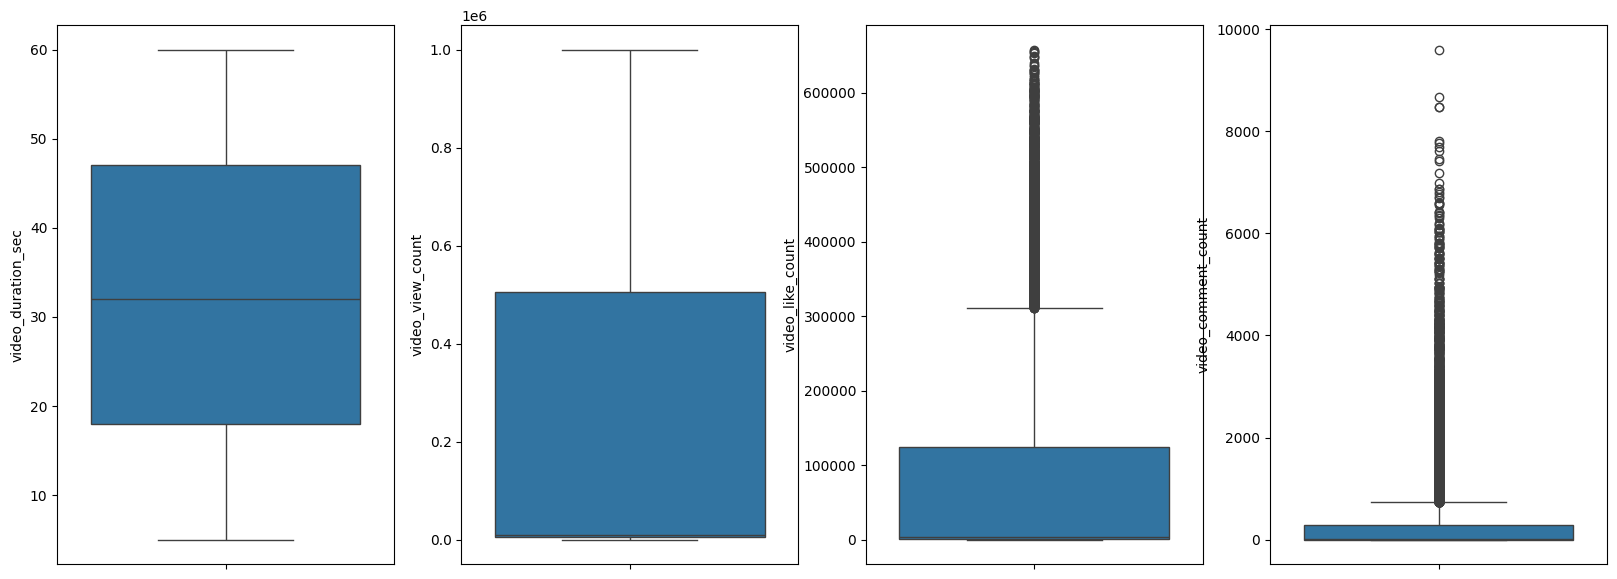

In [24]:
def box_plotting(dataframe:pd.DataFrame,column_list:list,show_outliers:bool= True):
    '''
    A brief function to get a chart with one or more boxplots on
    the same plot from the same dataframe.
    
    :param dataframe: The dataset that is been use for the EDA
    :param column_list: List of columns that you would like to boxplot
    :show_outliers: If you want to see outliers
    '''

    # First I will need to know if all the columns in the list belong to that data set 
    columns_check = all(column in dataframe.columns for column in column_list)
    if columns_check is False: return 'A column or more are not in the dataframe'
    
    # Create the subplot
    fig , axes = plt.subplots(1,len(column_list),figsize= (20,7))

    for column in column_list:
        sns.boxplot(
            dataframe[column],
            ax = axes[column_list.index(column)],
            showfliers = show_outliers
        )
    
    plt.show()

box_plotting(video,['video_duration_sec','video_view_count','video_like_count','video_comment_count'])

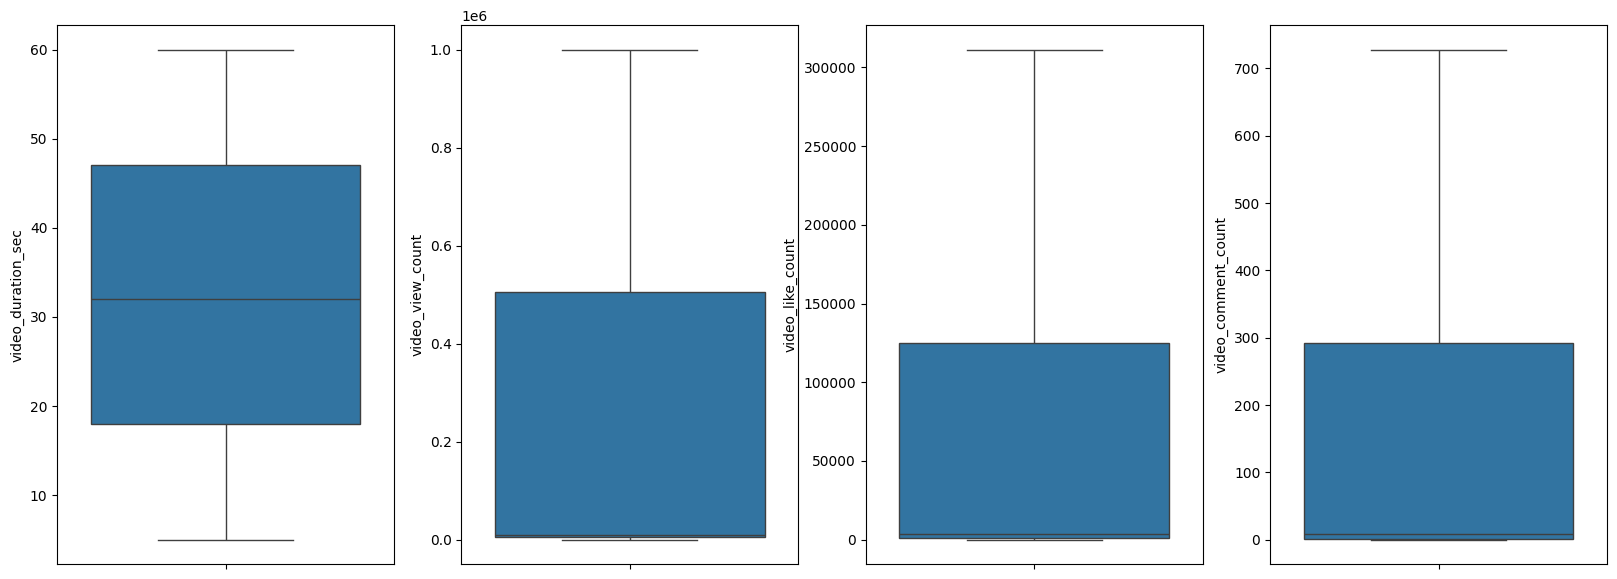

In [25]:
box_plotting(video,['video_duration_sec','video_view_count','video_like_count','video_comment_count'],False)